In [1]:
import tensorflow as tf
import os

In [2]:
#Limiting Memory Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
#getting data from google drive
data_dir = '/content/drive/MyDrive/data'

In [5]:
#Listing the data from the 'data' folder
os.listdir(data_dir)

['sad people', 'happy people']

In [6]:
#Images extension
image_ext = ['jpeg','jpg','png','bmp']

In [7]:
#printing the list
image_ext

['jpeg', 'jpg', 'png', 'bmp']

In [8]:
img = cv2.imread(os.path.join(data_dir,'happy people','happy_people.jpg'))

In [9]:
#Shape of the image
img.shape

(1000, 1500, 3)

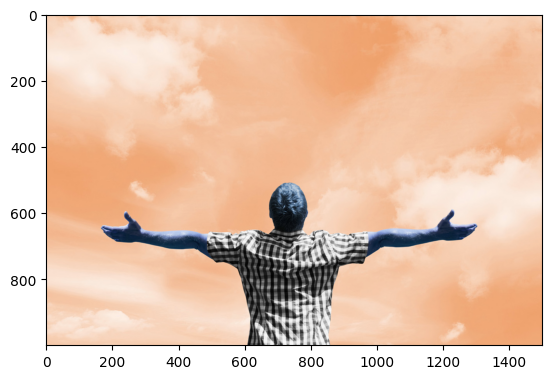

In [10]:
#Used matplotlib to get image
plt.imshow(img)

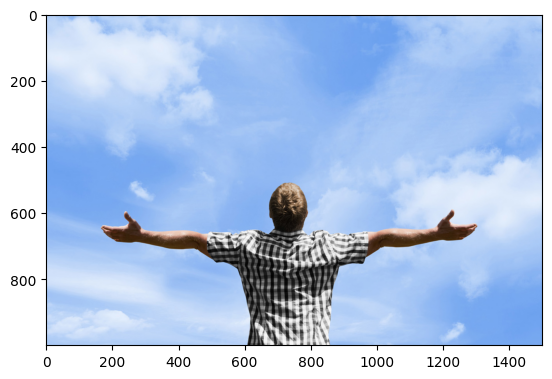

In [11]:
#Get the color
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
#Remove images with wrong extensions (basically removing uncessery images)
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_ext:
        print("Image not in ext list {}". format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with Image {}".format(image_path))

In [13]:
#Load the Data
import numpy as np

#Will resize images, make batches, shuffle etc
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 773 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator() #accessing data

In [15]:
batch = data_iterator.next() #grabbing batches

In [16]:
#Image represented as numpy.arrays
batch[0].shape

(32, 256, 256, 3)

In [17]:
#Class 1 = Sad People
#Class 0 = Happy People
batch[1]

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int32)

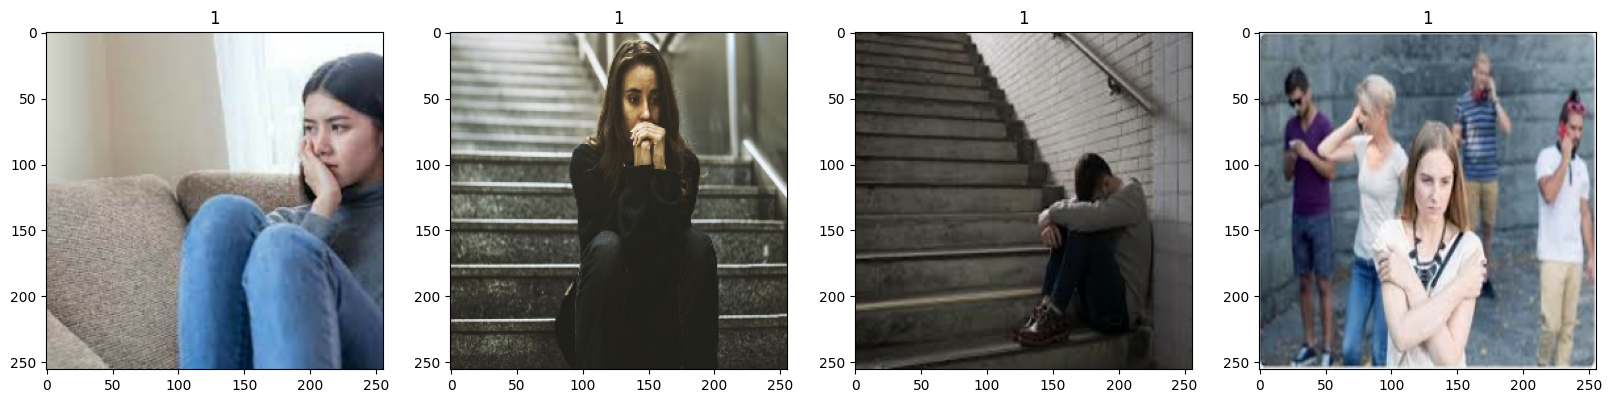

In [18]:
fig, ax = plt. subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1] [idx])

In [19]:
#Preprocessing data
#map function allows us to go through each element in the data
data = data.map(lambda x,y:(x/255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

1.0

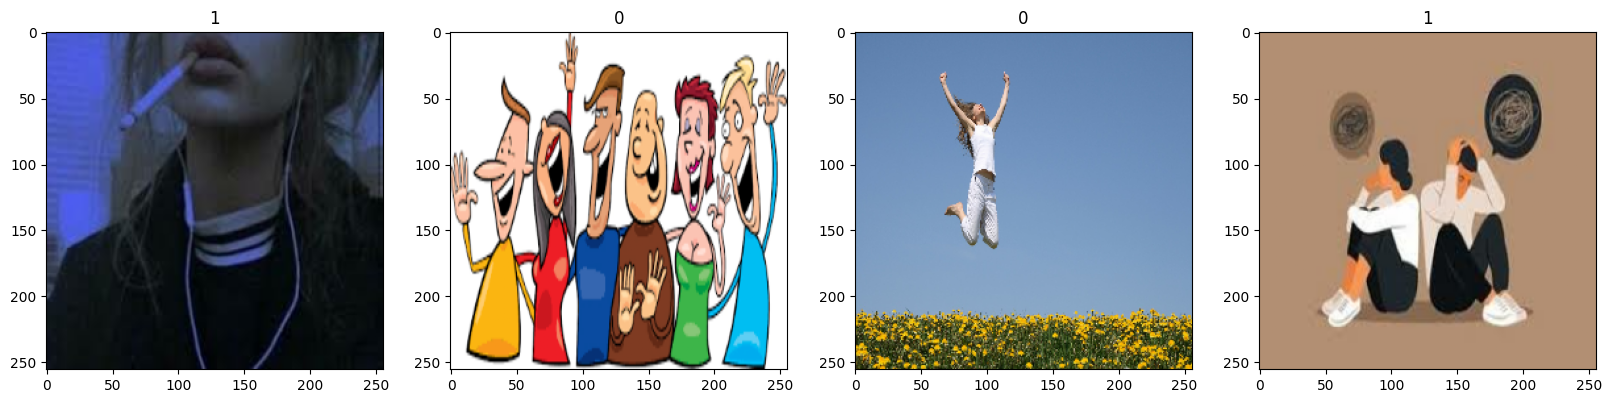

In [23]:
fig, ax = plt. subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1] [idx])

In [24]:
#Splitting data into training, testing, and validation set

In [25]:
len(data)

25

In [26]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)
test_size = int(len(data)*.1)+1

In [27]:
test_size + val_size + train_size

25

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [29]:
#Building Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [31]:
#layers
model.add(Conv2D(16 ,(3,3) ,1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3) ,1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3) ,1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [32]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
#summary helps us figure out how the model transforms our data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [34]:
logdir = 'logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
15/15 [==============================] - 23s 1s/step - loss: 0.1484 - accuracy: 0.9583 - val_loss: 0.2763 - val_accuracy: 0.9018
Epoch 2/20
15/15 [==============================] - 21s 1s/step - loss: 0.0907 - accuracy: 0.9729 - val_loss: 0.3167 - val_accuracy: 0.9107
Epoch 3/20
15/15 [==============================] - 24s 1s/step - loss: 0.0332 - accuracy: 0.9937 - val_loss: 0.4578 - val_accuracy: 0.9152
Epoch 4/20
 8/15 [===============>..............] - ETA: 9s - loss: 0.0598 - accuracy: 0.9922 

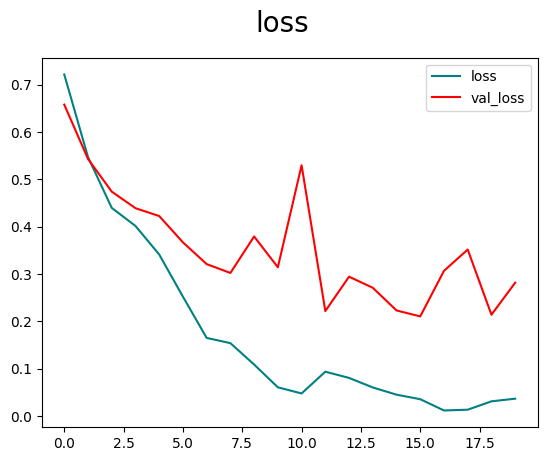

In [37]:
#Plotting data
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color ='red', label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

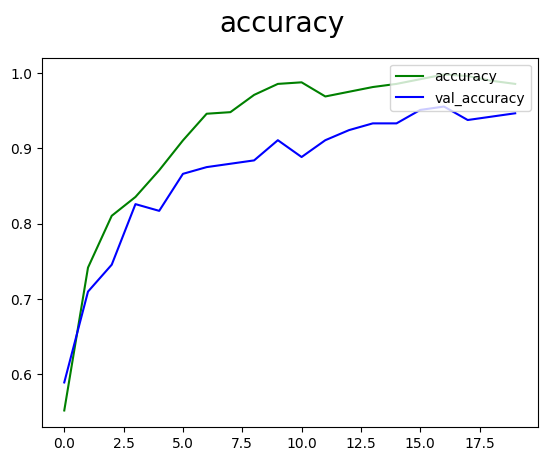

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

In [39]:
#evaluting data
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
prec = Precision()
rec = Recall()
bacc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  prec.update_state(y, yhat)
  rec.update_state(y,yhat)
  bacc.update_state(y,yhat)

1/1 [==============================] - 0s 108ms/step


In [42]:
print(f'Precision:{prec.result().numpy()}, Recall:{rec.result().numpy()}, BinaryAccuracy:{bacc.result().numpy()}')

Precision:0.8666666746139526, Recall:0.9629629850387573, BinaryAccuracy:0.9275362491607666


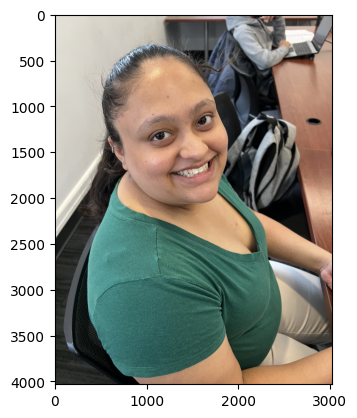

In [48]:
#Testing data
import cv2
img = cv2.imread('/content/drive/MyDrive/swathi.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

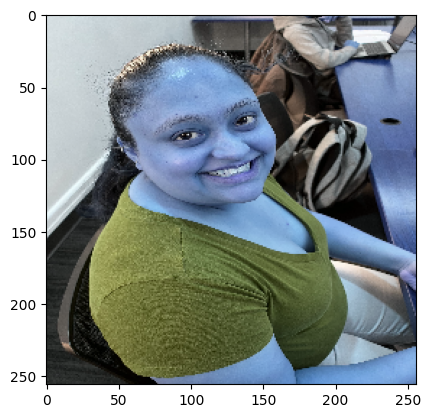

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [51]:
yhat

array([[0.49127156]], dtype=float32)

In [52]:
if yhat>0.5:
  print("Predicted class is Sad")
else:
  print("Predicted class is Happy")

Predicted class is Happy


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('model','happysadmodel.h5'))

In [ ]:
os.path.join('model','happysadmodel.h5')

'model/happysadmodel.h5'

In [ ]:
new_model = load_model(os.path.join('model','happysadmodel.h5'))

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/225 , 0))

1/1 [==============================] - 0s 218ms/step


In [ ]:
if yhat_new>0.5:
  print("Predicted class is Sad")
else:
  print("Predicted class is Happy")

Predicted class is Happy
